### Notebook 1: Exploratory Data Analysis
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### Project Objective

The primary aim of this project is to predict and understand the factors contributing to the failure of water points located throughout Tanzania.

### Background

Tanzania faces a critical challenge with nearly 50% of its population lacking access to safe drinking water. Among the various sources of water, the country heavily relies on approximately 60,000 water points, predominantly pumps. These water points are spread across diverse geographic regions, making data collection on their conditions a formidable task. Despite efforts involving local agencies and mobile-based crowd-sourcing initiatives, obtaining reliable data remains elusive.

The absence of high-quality data poses several issues, particularly for stakeholders like the Tanzanian Government, notably the Ministry of Water. Consequences encompass increased maintenance expenditures and the myriad of challenges faced by communities when their water access is compromised.

While the development of improved data collection infrastructure is a long-term goal, this project aspires to deliver valuable insights through predictive models, analyses, and uncovering the determinants of water point failure. Our objective is not solely limited to forecasting failures but also to shed light on the underlying causes. These insights will prove instrumental in optimizing resource allocation to maximize water access for individuals and communities. In the long run, this project will aid stakeholders in project planning and inform local, regional, and national-level policy formulation.


---

### Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import json

import warnings
# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Import Datasets

In [8]:
raw_data_folder_location = '../data/raw/'

# import features
independent_variables_df = pd.read_csv(f'{raw_data_folder_location}independent_variables.csv')

# import labels (target-variables) for features
dependent_variables_df = pd.read_csv(f'{raw_data_folder_location}dependent_variables.csv')

# merge features and it's labels (target variable)
df = pd.merge(independent_variables_df, dependent_variables_df)


---

## 1. Dependent Variable

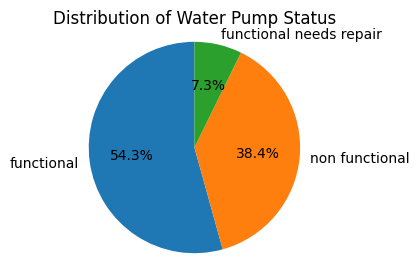

In [9]:
tgt_var_counts = df['status_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(tgt_var_counts.values, labels=tgt_var_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Water Pump Status')
plt.show()


**Observation:** <br>
- imbalanced distribution

---

## 2. Independent Variables

### 2.1) Numeric Independent Variables

In [10]:
df.drop(columns = ['status_group'])\
    .select_dtypes(include=['int64', 'float64'])\
        .nunique()\
            .sort_values() 

district_code           20
region_code             27
construction_year       55
num_private             65
amount_tsh              98
population            1049
gps_height            2428
longitude            57516
latitude             57517
id                   59400
dtype: int64

**Observation 1:**
- There seems to be variables misclassified as numeric, when infact they should be categorical
- - *district_code*, *region_code*
- We are unsure what the variable: *num_private* means. Data Dictionary doesn't provide any information
- There are 59600 unique values for variable: *id*. We have the same amount of observations.

**Action 1:**
- Change data type of variables: *district_code* and *region_code* to categorical
- Look more into the variable: *num_private*
- drop variable: *id*

---

### 2.2) String/Categorical/Object independent variables

In [11]:
df.drop(columns = ['status_group'])\
    .select_dtypes(include=['object'])\
        .nunique()\
            .sort_values()

recorded_by                  1
public_meeting               2
permit                       2
source_class                 3
management_group             5
quantity_group               5
quantity                     5
waterpoint_type_group        6
quality_group                6
payment_type                 7
source_type                  7
waterpoint_type              7
extraction_type_class        7
payment                      7
water_quality                8
basin                        9
source                      10
scheme_management           11
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
date_recorded              356
funder                    1896
ward                      2092
installer                 2145
scheme_name               2695
subvillage               19287
wpt_name                 37399
dtype: int64

**Observation 2:**
- there is only 1 unique value for variable: *recorded_by*
- variables: *permit* and *public_meeting* seem to be boolean
- all of the following are candidates to be converted into categorical data type:
*source_class*, *management_group*, *quantity_group*, *quantity*, *waterpoint_type_group*, *quality_group*, *source_type*, *payment_type*, *waterpoint_type*, *extraction_type_class*, *payment*, *water_quality*, *basin*, *source*, *scheme_management*, *management*, *extraction_type_group*, *extraction_type*, *region*, *lga*, *funder*, *ward*, *installer*, *scheme_name*

**Action: 2**
- drop variable: 'recorded_by'
- change data type for variables: *permit* and *public_meeting* to boolean
- look into the following and convert the appropriate variables to categorical data type:
*source_class*, *management_group*, *quantity_group*, *quantity*, *waterpoint_type_group*, *quality_group*, *source_type*, *payment_type*, *waterpoint_type*, *extraction_type_class*, *payment*, *water_quality*, *basin*, *source*, *scheme_management*, *management*, *extraction_type_group*, *extraction_type*, *region*, *lga*, *funder*, *ward*, *installer*, *scheme_name*

---

### Let us take the above actions before moving on with further EDA

**Action 1:**
- Change data type of variables: *district_code* and *region_code* to categorical
- Look more into the variable: *num_private*
- drop variable: *id*

In [12]:
df['district_code'] = df['district_code'].astype('category')
df['region_code'] = df['region_code'].astype('category')

In [13]:
df['num_private'].value_counts(normalize=True)

num_private
0       0.987256
6       0.001364
1       0.001229
5       0.000774
8       0.000774
          ...   
42      0.000017
23      0.000017
136     0.000017
698     0.000017
1402    0.000017
Name: proportion, Length: 65, dtype: float64

**Observation 1.1:**
- 98.7% of the data in num_private is 0

**Options 1.1:**
- We could look more into the relationship of *num_private* with the target variable
- Given the lack of information in data dictionary on variable *num_private*, and with 98.7% of its values 0, we can drop it

**Action 1.1:**
- drop variable: *num_private*

In [14]:
df.drop(columns = ['num_private', 'id', 'recorded_by'], inplace = True)


**Action: 2**
- drop variable: 'recorded_by'
- change data type for variables: *permit* and *public_meeting* to boolean
- look into the following and convert the appropriate variables to categorical data type:
*source_class*, *management_group*, *quantity_group*, *quantity*, *waterpoint_type_group*, *quality_group*, *source_type*, *payment_type*, *waterpoint_type*, *extraction_type_class*, *payment*, *water_quality*, *basin*, *source*, *scheme_management*, *management*, *extraction_type_group*, *extraction_type*, *region*, *lga*, *funder*, *ward*, *installer*, *scheme_name*

In [15]:
# df['permit'] = df['permit'].astype('boolean')
# df['public_meeting'] = df['public_meeting'].astype('boolean')

# let us refrain from changing these to boolean, since it might complicate dealing with the missing values later on

In [16]:
# List of column names to convert to 'category'
# also include the target variable: status_group
columns_to_convert = df[['source_class', 'management_group', \
    'quantity_group', 'quantity', 'waterpoint_type_group', 'quality_group',\
        'source_type', 'payment_type', 'waterpoint_type', 'extraction_type_class',\
              'payment', 'water_quality', 'basin', 'source', 'scheme_management', 'management',\
                    'extraction_type_group', 'extraction_type', 'region', 'lga', 'funder', 'ward',\
                        'installer', 'scheme_name', 'status_group']]

for column in columns_to_convert:
    df[column] = df[column].astype('category')

**All actions above taken**

---

### Export datatypes as strings into a json file

In [17]:
data_types_str = {col: str(dtype) for col, dtype in df.dtypes.items()}

with open('../data/processed/data_types.json', 'w') as f:
    json.dump(data_types_str, f)

### Export Dataset

In [18]:
df.to_csv('../data/processed/post_eda_data.csv', index = False)

---

## Summary

### Actions Taken:
- columns dropped:
- datatype changed to boolen:
- datatype changed to category: 